In [1]:
#scikit learner

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("/Users/sabinkakotsur/Documents/Python/NLP with Python/TextFiles/smsspamcollection.tsv", sep="\t")

In [5]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [6]:
df.isnull()

,label,message,length,punct
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [7]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [8]:
len(df)

5572

In [9]:
df["label"]

0        ham
1        ham
2       spam
3        ham
4        ham
5       spam
6        ham
7        ham
8       spam
9       spam
10       ham
11      spam
12      spam
13       ham
14       ham
15      spam
16       ham
17       ham
18       ham
19      spam
20       ham
21       ham
22       ham
23       ham
24       ham
25       ham
26       ham
27       ham
28       ham
29       ham
        ... 
5542     ham
5543     ham
5544     ham
5545     ham
5546     ham
5547    spam
5548     ham
5549     ham
5550     ham
5551     ham
5552     ham
5553     ham
5554     ham
5555     ham
5556     ham
5557     ham
5558     ham
5559     ham
5560     ham
5561     ham
5562     ham
5563     ham
5564     ham
5565     ham
5566    spam
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [10]:
df["label"].unique()

array(['ham', 'spam'], dtype=object)

In [11]:
df["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

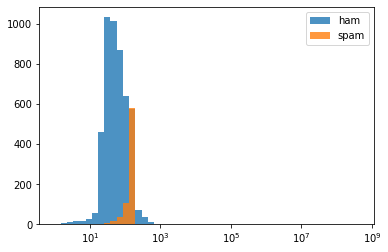

In [13]:
plt.xscale("log")
bins = 1.5**(np.arange(0,50))
plt.hist(df[df["label"]=="ham"]["length"],bins=bins,alpha=0.8)
plt.hist(df[df["label"]=="spam"]["length"],bins=bins,alpha=0.8)
plt.legend(("ham", "spam"))
plt.show()

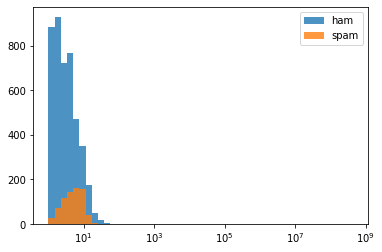

In [14]:
plt.xscale("log")
bins = 1.5**(np.arange(0,50))
plt.hist(df[df["label"]=="ham"]["punct"],bins=bins,alpha=0.8)
plt.hist(df[df["label"]=="spam"]["punct"],bins=bins,alpha=0.8)
plt.legend(("ham", "spam"))
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df[["length", "punct"]]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [17]:
X_train.shape

(3900, 2)

In [18]:
X_test.shape

(1672, 2)

In [19]:
y_test

3245     ham
944      ham
1044     ham
2484     ham
812      ham
2973     ham
2991     ham
2942     ham
230      ham
1181     ham
1912     ham
1992     ham
5435     ham
4805     ham
401     spam
1859     ham
1344     ham
2952     ham
501      ham
3337     ham
1945     ham
3142     ham
2422     ham
381      ham
5567    spam
4937     ham
79       ham
5240     ham
2554     ham
5345     ham
        ... 
1170     ham
1391     ham
4337     ham
220      ham
1662     ham
627      ham
3545     ham
2809     ham
83       ham
3102     ham
790      ham
2476     ham
461      ham
4907     ham
551      ham
3375     ham
4020    spam
3516     ham
198      ham
3193     ham
2857     ham
402      ham
3782     ham
4456     ham
5308     ham
2505     ham
2525    spam
4975     ham
650     spam
4463     ham
Name: label, Length: 1672, dtype: object

In [20]:
X_train.shape

(3900, 2)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr_model = LogisticRegression(solver="lbfgs")

In [23]:
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
from sklearn import metrics

In [25]:
predictions = lr_model.predict(X_test)

In [26]:
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [27]:
# y_test

In [28]:
print(metrics.confusion_matrix(y_test,predictions))

[[1404   44]
 [ 219    5]]


In [29]:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=["ham","spam"], columns=["ham","spam"])

In [30]:
df

,ham,spam
ham,1404,44
spam,219,5


In [31]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [37]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
predictions = nb_model.predict(X_test)
print(metrics.confusion_matrix(y_test, predictions))

[[1438   10]
 [ 224    0]]


In [38]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

    accuracy                           0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672



In [39]:
from sklearn.svm import SVC

svc_model = SVC(gamma="auto")
svc_model.fit(X_train,y_train)
predictions = svc_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1373   75]
 [ 121  103]]


In [40]:
# project

In [41]:
df1 = pd.read_csv("/Users/sabinkakotsur/Documents/Python/NLP with Python/TextFiles/moviereviews.tsv", sep="\t")

In [42]:
df1.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [43]:
len(df1)

2000

In [44]:
df1.isnull().sum()

label      0
review    35
dtype: int64

In [45]:
df1.dropna(inplace=True)

In [46]:
blanks=[]

for i,lb,rv in df1.itertuples():
    if str(rv).isspace():
        blanks.append(i)

In [47]:
blanks

[57,
 71,
 147,
 151,
 283,
 307,
 313,
 323,
 343,
 351,
 427,
 501,
 633,
 675,
 815,
 851,
 977,
 1079,
 1299,
 1455,
 1493,
 1525,
 1531,
 1763,
 1851,
 1905,
 1993]

In [48]:
df1.drop(blanks,inplace=True)

In [49]:
len(df1)

1938

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
df1

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
5,neg,"to put it bluntly , ed wood would have been pr..."
6,neg,"synopsis : melissa , a mentally-disturbed woma..."
7,neg,tim robbins and martin lawernce team up in thi...
8,neg,"in "" gia "" , angelina jolie plays the titular ..."
9,neg,"in 1990 , the surprise success an unheralded l..."


In [52]:
X = df1["review"]

In [53]:
y = df1["label"]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set

from sklearn.svm import LinearSVC
clf = LinearSVC() 

from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

text_clf.fit(X_train,y_train)

predictions = text_clf.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [57]:
print(confusion_matrix(y_test,predictions))

[[235  47]
 [ 41 259]]


In [58]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         neg       0.85      0.83      0.84       282
         pos       0.85      0.86      0.85       300

    accuracy                           0.85       582
   macro avg       0.85      0.85      0.85       582
weighted avg       0.85      0.85      0.85       582



In [59]:
print(accuracy_score(y_test,predictions))

0.8487972508591065
